In [21]:
## importing library

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


In [23]:
import tensorflow as tf

from tensorflow import keras

In [24]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM

from keras.models import Sequential

from tensorflow.keras.utils import to_categorical

from keras import callbacks

from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score,f1_score, classification_report

In [26]:
data = pd.read_csv("heart.csv")

In [27]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [28]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [36]:
def print_ojective_columns(df):
    for columns in data:
        if data[columns].dtypes == 'object':
            print(f'{columns} : {data[columns].unique()}')

In [37]:
print_ojective_columns(data)

Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']


In [40]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

In [42]:
data['Sex'] = encode.fit_transform(data['Sex'])
data['ChestPainType'] = encode.fit_transform(data['ChestPainType'])
data['RestingECG'] = encode.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = encode.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = encode.fit_transform(data['ST_Slope'])

In [43]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [67]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [68]:
x = data.drop(['HeartDisease'], axis =1)
y = data['HeartDisease']

In [69]:
scaler = StandardScaler()
xdf = scaler.fit_transform(x)

col_names = list(x.columns)

xdf = pd.DataFrame(xdf, columns = col_names)

In [70]:
xdf

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.293283,-0.596078
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.357094,-0.596078
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.293283,-0.596078
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.832432,-0.596078


In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 41, test_size = 0.2)

In [72]:
print(x_train.shape,
     x_test.shape,
     y_train.shape,
     y_test.shape)

(734, 11) (184, 11) (734,) (184,)


In [78]:
early_stopping = callbacks.EarlyStopping(min_delta= 0.001,patience =30,restore_best_weights =True)

model = Sequential()


model.add(Dense(units =16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1, kernel_initializer ='uniform', activation ='sigmoid'))

from tensorflow.keras.optimizers import SGD

model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [80]:
history = model.fit(x_train,y_train, batch_size = 32, epochs = 500, callbacks =[early_stopping], validation_split = 0.2)

Epoch 1/500
19/19 [==============================] - 0s 13ms/step - loss: 0.5070 - accuracy: 0.7905 - val_loss: 0.3582 - val_accuracy: 0.8912
Epoch 2/500
19/19 [==============================] - 0s 6ms/step - loss: 0.5231 - accuracy: 0.7683 - val_loss: 0.4631 - val_accuracy: 0.8163
Epoch 3/500
19/19 [==============================] - 0s 6ms/step - loss: 0.5276 - accuracy: 0.7802 - val_loss: 0.3869 - val_accuracy: 0.9048
Epoch 4/500
19/19 [==============================] - 0s 8ms/step - loss: 0.4977 - accuracy: 0.8126 - val_loss: 0.3683 - val_accuracy: 0.9184
Epoch 5/500
19/19 [==============================] - 0s 6ms/step - loss: 0.5083 - accuracy: 0.7973 - val_loss: 0.3834 - val_accuracy: 0.8844
Epoch 6/500
19/19 [==============================] - 0s 22ms/step - loss: 0.4881 - accuracy: 0.8143 - val_loss: 0.3489 - val_accuracy: 0.9184
Epoch 7/500
19/19 [==============================] - 0s 13ms/step - loss: 0.5146 - accuracy: 0.7649 - val_loss: 0.3705 - val_accuracy: 0.8980
Epoch 8/50

In [82]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy',val_accuracy*100))


val_accuracy: 86.61%


In [100]:
y_pred = model.predict(x_test)
y_pred = (y_pred >0.5)



6/6 [==============================] - 0s 3ms/step


In [102]:
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

<AxesSubplot:>

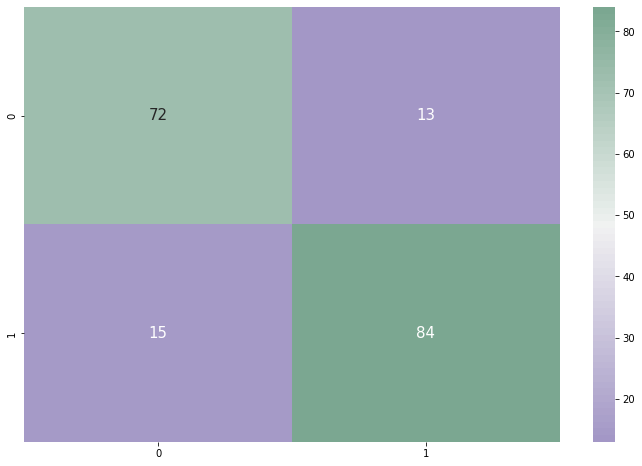

In [111]:
cmap1 = sns.diverging_palette(275,150, s=40,l=65,n=65)
plt.figure(figsize=(12,8))

cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,cmap = cmap1,annot =True, annot_kws ={'size':15})